## Relation beetwen the number of drunk drivers and the number of accidents

In [12]:
import pandas as pd
import numpy as np
from google.cloud import bigquery

#Extract the data from bigquery
client = bigquery.Client(project='phydata-desafio1')
QUERY7 = """
SELECT
  state_name,
  COUNT(consecutive_number) AS number_of_accidents,
FROM
  `phydata-desafio1.nhtsa_traffic_fatalities.accident_2015`
WHERE 
  number_of_drunk_drivers > 0
GROUP BY
  state_name
ORDER BY
  state_name
  """
query_job = client.query(QUERY7)  # API request
results = query_job.result()  # Waits for query to finish
data_frame_drunk_drivers = results.to_dataframe()
name_database = 'state_name_accidents_by_drunk_drivers' # Name of the database
data_frame_drunk_drivers.to_csv(name_database + '.csv', index=False) #Save the data in a csv file

In [13]:
import pandas as pd
import numpy as np
from google.cloud import bigquery

#Extract the data from bigquery
client = bigquery.Client(project='phydata-desafio1')
QUERY8 = """
SELECT 
    state_name, 
    COUNT(consecutive_number) AS all_accidents
FROM 
    `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY
    state_name
ORDER BY 
    state_name
"""
query_job = client.query(QUERY8)  # API request
results = query_job.result()  # Waits for query to finish
data_frame_all_accidents = results.to_dataframe()
name_database = 'state_name_all_accidents' # Name of the database
data_frame_all_accidents.to_csv(name_database + '.csv', index=False) #Save the data in a csv file

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'Arizona'),
  Text(3, 0, 'Arkansas'),
  Text(4, 0, 'California'),
  Text(5, 0, 'Colorado'),
  Text(6, 0, 'Connecticut'),
  Text(7, 0, 'Delaware'),
  Text(8, 0, 'District of Columbia'),
  Text(9, 0, 'Florida'),
  Text(10, 0, 'Georgia'),
  Text(11, 0, 'Hawaii'),
  Text(12, 0, 'Idaho'),
  Text(13, 0, 'Illinois'),
  Text(14, 0, 'Indiana')])

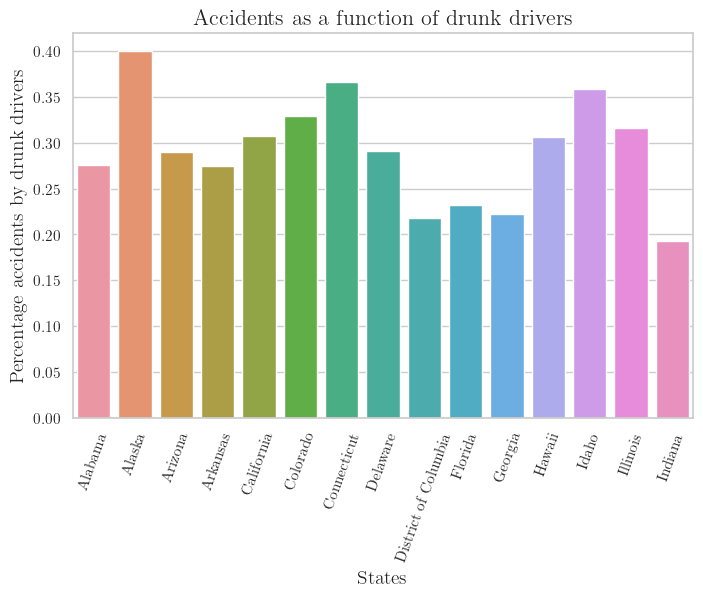

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Llamamos a los datos
df1 = pd.read_csv('state_name_accidents_by_drunk_drivers.csv')
df2 = pd.read_csv('state_name_all_accidents.csv')

#Dividimos la columna de accidentes por estado entre el número de accidentes totales por estado
df_relation = pd.DataFrame({'state_name': df1['state_name'], 'relation_all_acc_dru_acc': df1['number_of_accidents']/df2['all_accidents']})
result_limitado1 = df_relation.head(15)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))  # Tamaño del gráfico
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
sns.barplot(x='state_name', y='relation_all_acc_dru_acc', data=result_limitado1)
# legend.set_zorder(2)  # Ajusta el valor de zorder para colocar la leyenda por encima de las líneas


# Etiquetas y título
plt.xlabel(r'States',fontdict={'fontsize': 14})
plt.ylabel(r'Percentage accidents by drunk drivers',fontdict={'fontsize': 14})
plt.title(r'Accidents as a function of drunk drivers',fontdict={'fontsize': 16})
plt.xticks(rotation=70)